# Network comparison with Scikit-Learn

Simple comparison between implemented network and Scikit-Learn MLP for a
classification and a regression task.

## Classification

Binary classification task:

- 2-dimensional input features.
- 0 or 1 as possible classes.

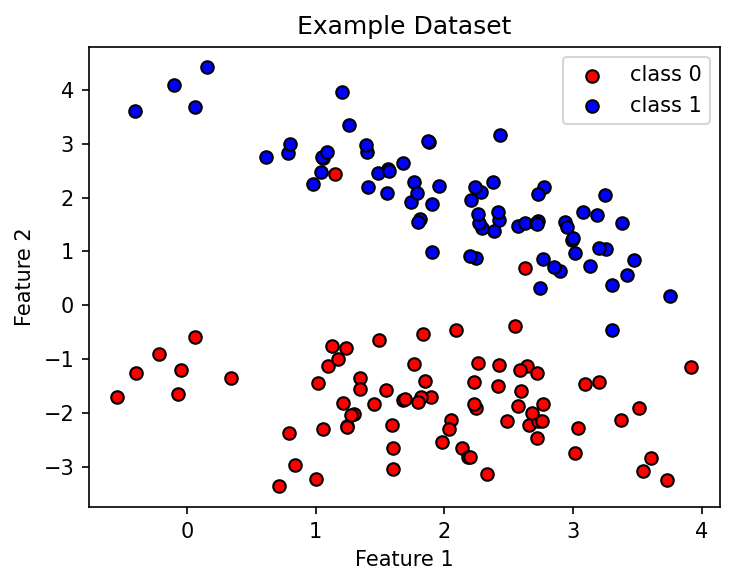

In [5]:
import numpy as np
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt

n_features = 2
X, y = [
    np.array(i)
    for i in make_classification(
        n_samples=150,
        n_features=n_features,
        n_informative=n_features,
        n_redundant=0,
        n_repeated=0,
        n_clusters_per_class=1,
        class_sep=2,
        random_state=0,
    )
]

cls0 = X[y == 0].T
cls1 = X[y == 1].T

plt.figure(figsize=(5, 4), dpi=150)
plt.title("Example Dataset")

plt.scatter(cls0[0], cls0[1], c="r", ec="k", label="class 0")
plt.scatter(cls1[0], cls1[1], c="b", ec="k", label="class 1")

plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.tight_layout()
plt.show()

The model is compared with Scikit-Learn `MLPClassifier` with one unit and same
hyper-parameters.

- _Logistic_ activation function.
- Learning rate $\eta = 0.03$.
- Stochastic Gradient Descent
- Batch size equal to 1


In [6]:
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier

from plotting import loss_decision_boundary
from neural.network import Network

# Scikit-Learn
mlp = MLPClassifier(
    hidden_layer_sizes=(5,),
    activation="logistic",
    solver="sgd",
    learning_rate_init=0.3,
    batch_size=1,
    max_iter=500,
)

mlp.fit(X, y)
print(f"sklearn loss: {mlp.loss_:.4f}")

pred = mlp.predict(X)
accuracy = accuracy_score(y, pred)
print(f"sklearn accuracy: {accuracy:.2f}")

net = Network(
    hidden_layer_sizes=(5, 1),
    activation="logistic",
    learning_rate=0.3,
    batch_size=1,
    max_iter=500
)

net.fit(X, y)

y_pred = np.round(net.predict(X))
accuracy = accuracy_score(y, y_pred)
print(f"net accuracy: {accuracy:.2f}")

# loss_decision_boundary(loss, mlp.loss_curve_, X, y, neuron, mlp)

sklearn loss: 0.2784
sklearn accuracy: 0.98
net accuracy: 0.99


## Regression

Univariate linear regression task.

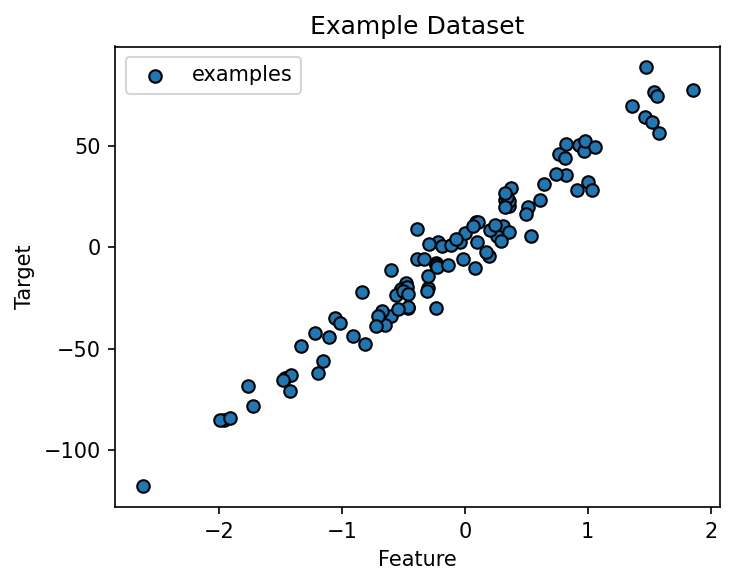

In [3]:
from sklearn.datasets import make_regression


X, y = [
    np.array(i)
    for i in make_regression(
        n_samples=100,
        n_features=1,
        n_informative=1,
        noise=10,
        random_state=42,
    )
]

plt.figure(figsize=(5, 4), dpi=150)
plt.title("Example Dataset")

plt.scatter(X.T[0], y, ec="k", label="examples")

plt.xlabel("Feature")
plt.ylabel("Target")
plt.legend()
plt.tight_layout()
plt.show()

The model is compared with Scikit-Learn `MLPRegressor` with one unit and same
hyper-parameters.

- _Linear_ activation function.
- Learning rate $\eta = 0.001$.
- Stochastic Gradient Descent
- Batch size equal to 1


sklearn loss: 65.8366
sklearn RMSE: 9.94
neuron loss: 79.8162
neuron accuracy: 1.00


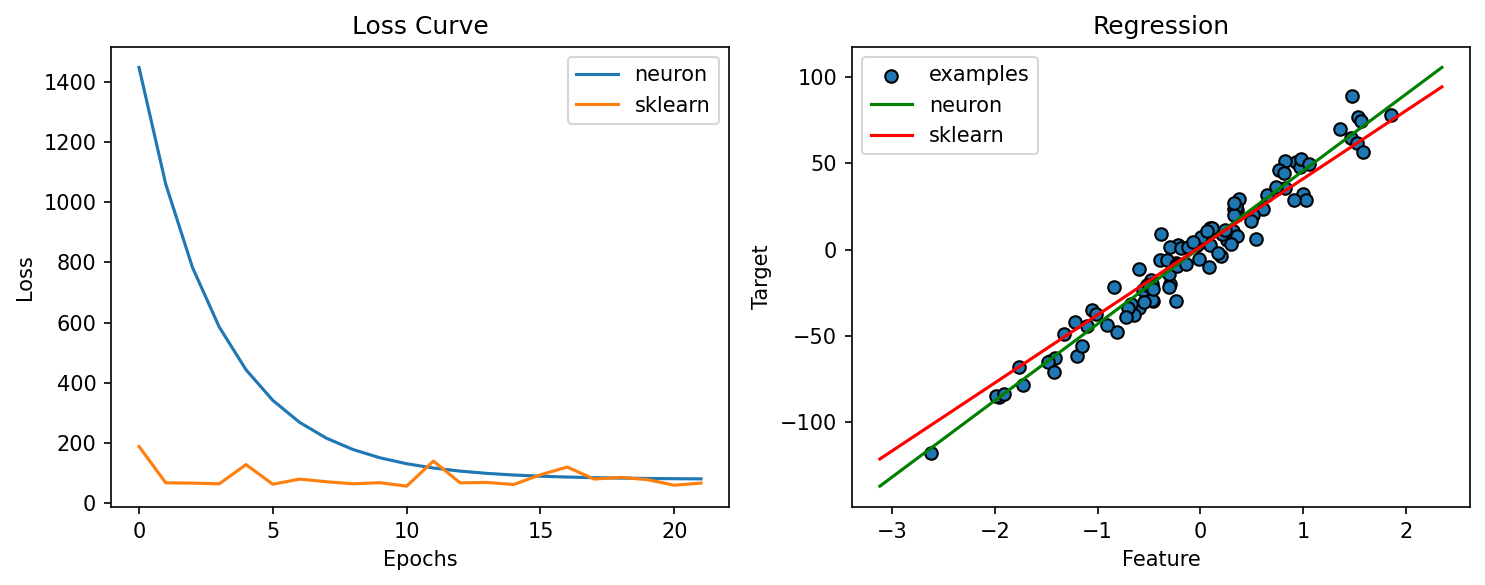

In [4]:
from sklearn.metrics import root_mean_squared_error
from sklearn.neural_network import MLPRegressor

from plotting import loss_fit


# Scikit-Learn
mlp = MLPRegressor(
    hidden_layer_sizes=(1,),  # 1 neuron
    activation="identity",
    solver="sgd",
    learning_rate_init=0.001,
    batch_size=1,
    max_iter=1000,
)

mlp.fit(X, y)
print(f"sklearn loss: {mlp.loss_:.4f}")

pred = mlp.predict(X)
rmse = root_mean_squared_error(y, pred)
print(f"sklearn RMSE: {rmse:.2f}")


neuron = Neuron(
    activation="linear",
    learning_rate=0.001,
)

neuron.init_weights(X.shape[1])

loss = []
batch_size = 1
for epoch in range(1000):
    epoch_loss = 0.0
    loss.append(0.0)
    for i in range(0, len(y), batch_size):
        out = neuron.output(X[i : i + batch_size, :])
        error = out - y[i : i + batch_size]
        neuron.update_weights(X[i : i + batch_size, :], error)
        
        epoch_loss += np.sum(error**2) / batch_size
    loss[epoch] += epoch_loss / y.size

print(f"neuron loss: {loss[: len(mlp.loss_curve_)][-1]:.4f}")

out = np.round(neuron.output(X))
rmse = root_mean_squared_error(y, out)
print(f"neuron accuracy: {accuracy:.2f}")

loss_fit(loss, mlp.loss_curve_, X, y, neuron, mlp)